# Zastosowanie sztucznej inteligencji IBM Watson

### 1. Połączenie się z IBM Cloud za pomocą API

Potrzebne biblioteki

In [30]:
from ibm_watson import VisualRecognitionV3, ApiException
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from IPython.display import Image
from IPython.core.display import display, HTML
import zipfile
import os
import json

Autoryzacja 

In [31]:
authenticator = IAMAuthenticator('e9Eeu6hkRaPEwO05UYRLrGmmot3OvDqa-1DLfjuY85ad')

Stworzenie obiektu VisualRecognitionV3

In [32]:
service = VisualRecognitionV3(
    version='2019-12-19',
    authenticator=authenticator)

Wskazanie adresu pod którym znajduje się API IBM Cloud

In [33]:
service.set_service_url(
'https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/8c0dc5a5-aae6-4f84-a1ba-50563dc2b957'
                        )

### 2. Zlecenie klasyfikacji zdjęć oraz odebranie wyników

Ścieżka folderu ze zdjęciami

In [34]:
directory = 'images_to_classify/'

Lista do przechowywania wyników

In [35]:
classification_results = []

### 2.1. Ogólne klasyfikatory IBM

Iterując po plikach zlecamy klasyfikację każdego z obrazów przez IBM Watson

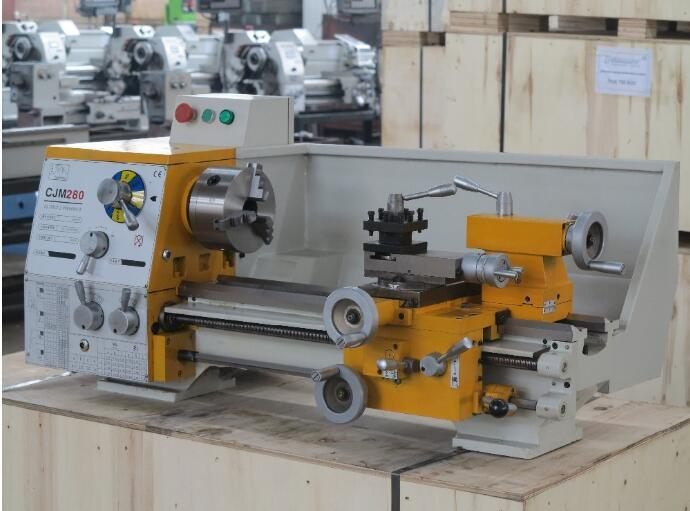

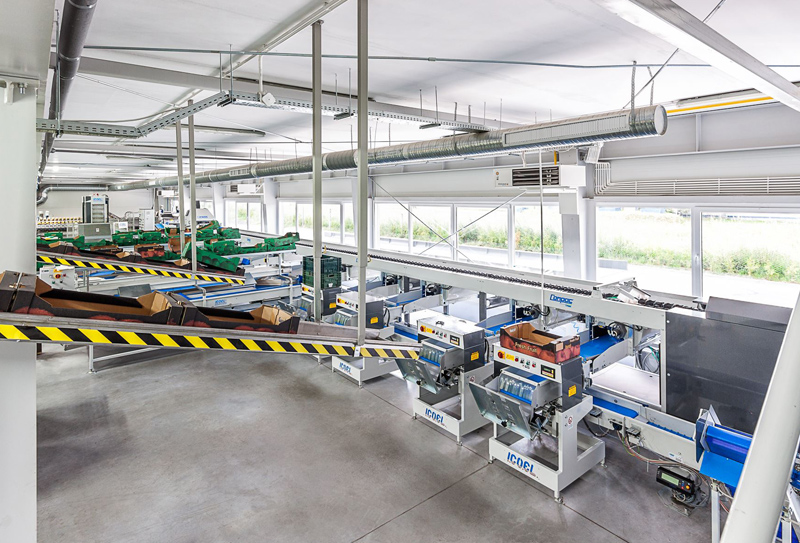

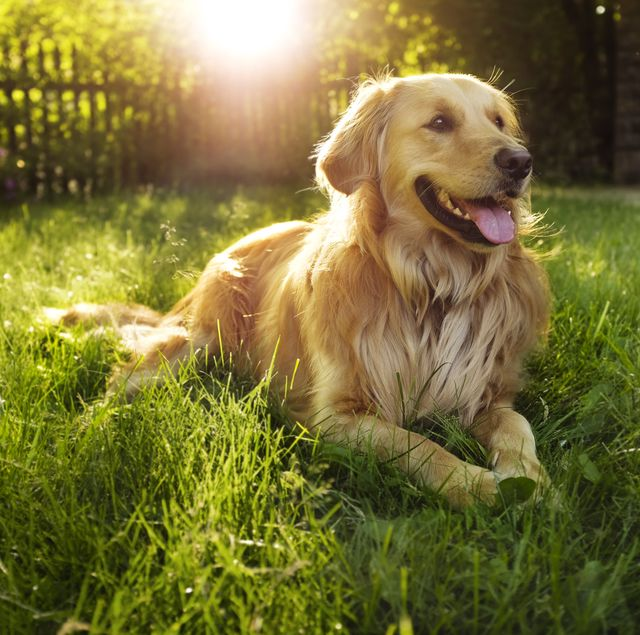

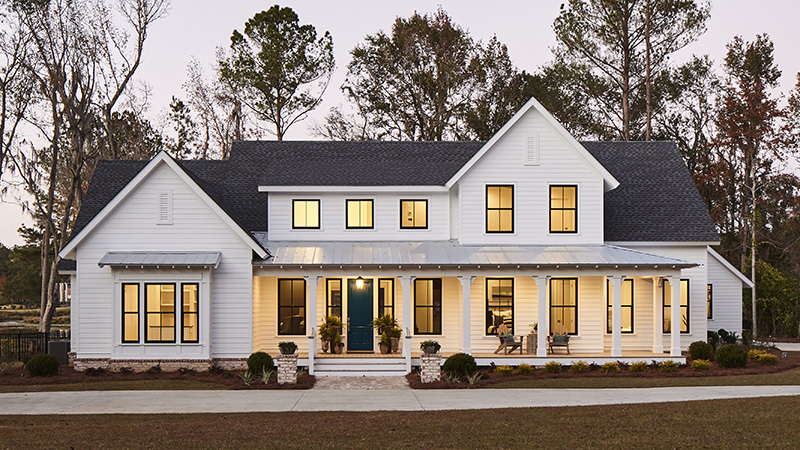

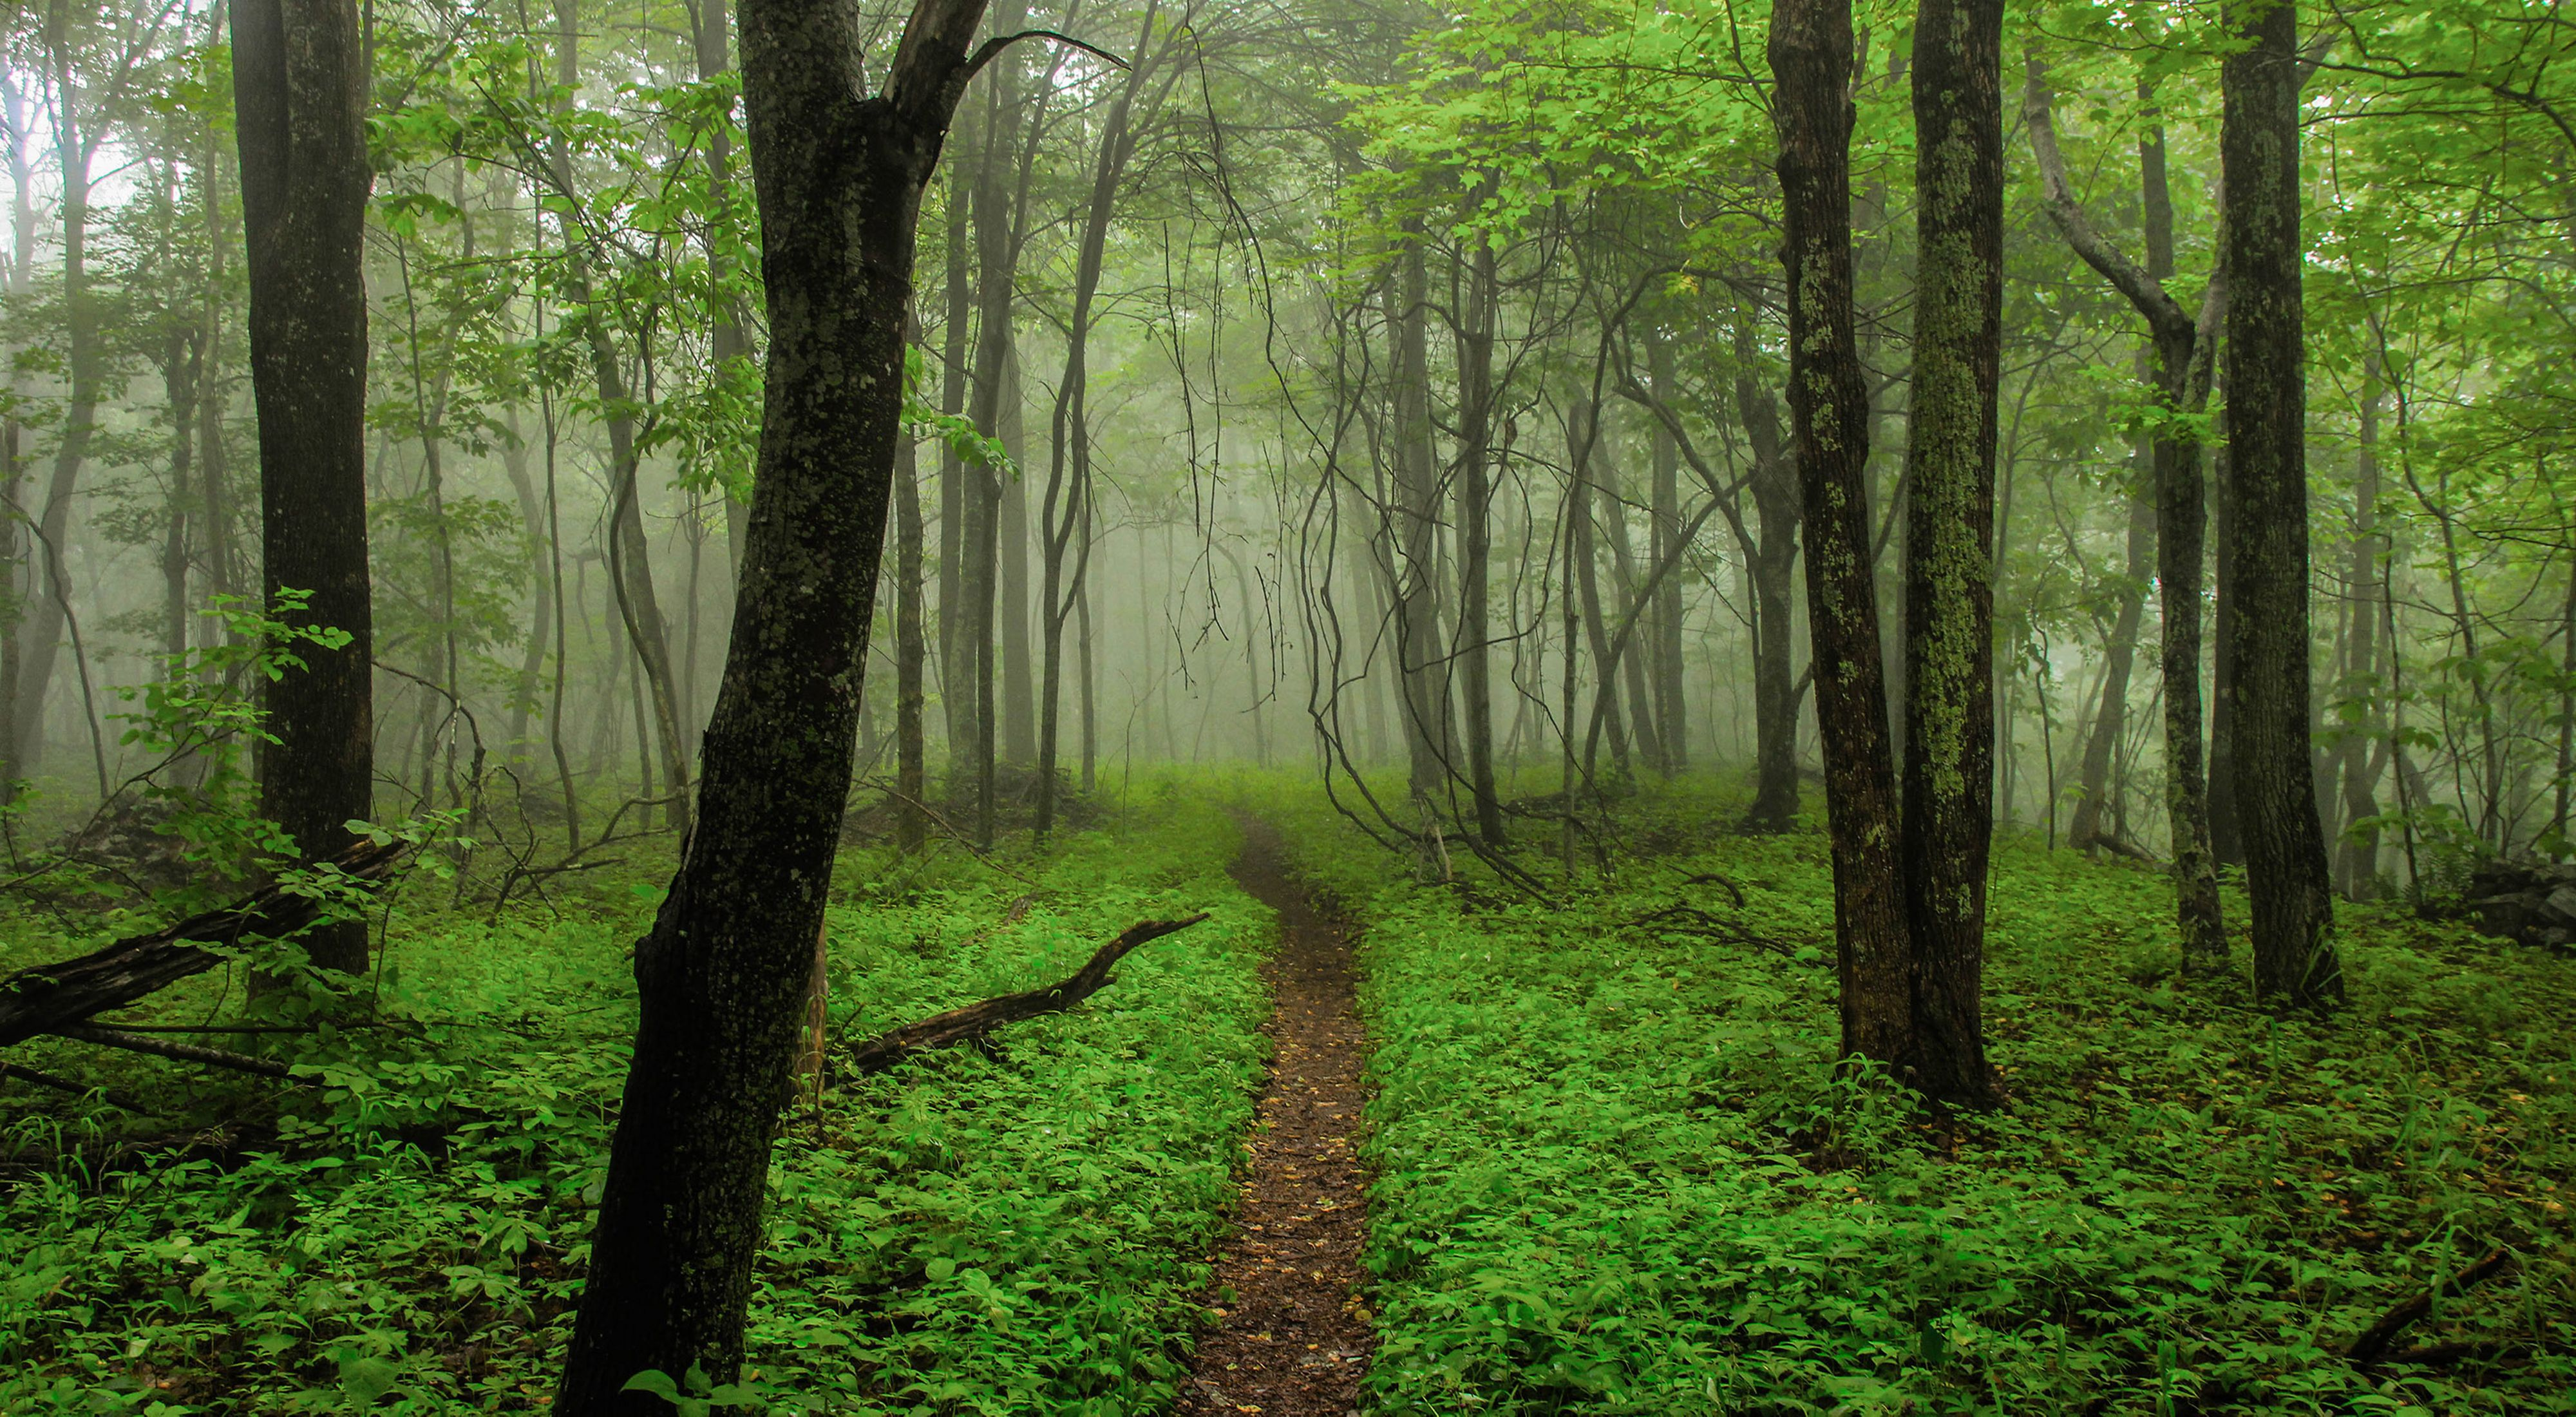

In [48]:
for filename in os.listdir(directory):
    
    with open(os.path.join(directory, filename), 'rb') as images_file:
        
        # zapytanie do IBM Cloud
        response = service.classify(images_file=images_file).get_result()
        
    # wyodrębnienie interesujących nas informacji z pliku .json
    classes = response['images'][0]['classifiers'][0]['classes']

    # wyświetlenie obrazu
    display(Image(filename=os.path.join(directory, filename), width=400, height=400))

    # wyświetlenie wyników razem z pewnością
    for result in classes:
        display(HTML(str(result['class']) + ': ' + str(round(result['score'] * 100, 2)) + '%'))

    # pusta linia dla czytelności
    display(HTML('<br>'))

### 2.2 Niestandardowy klasyfikator

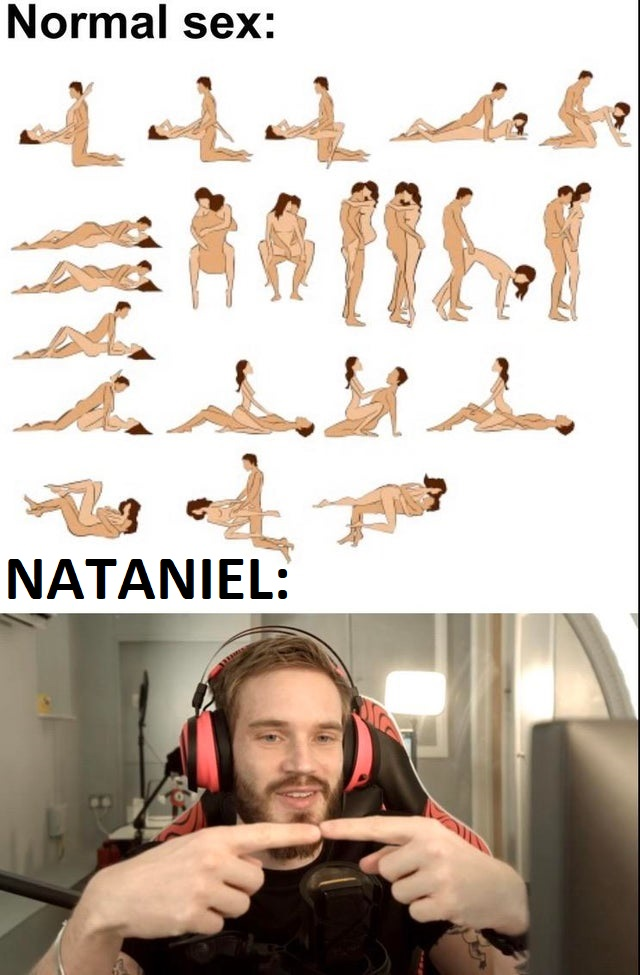

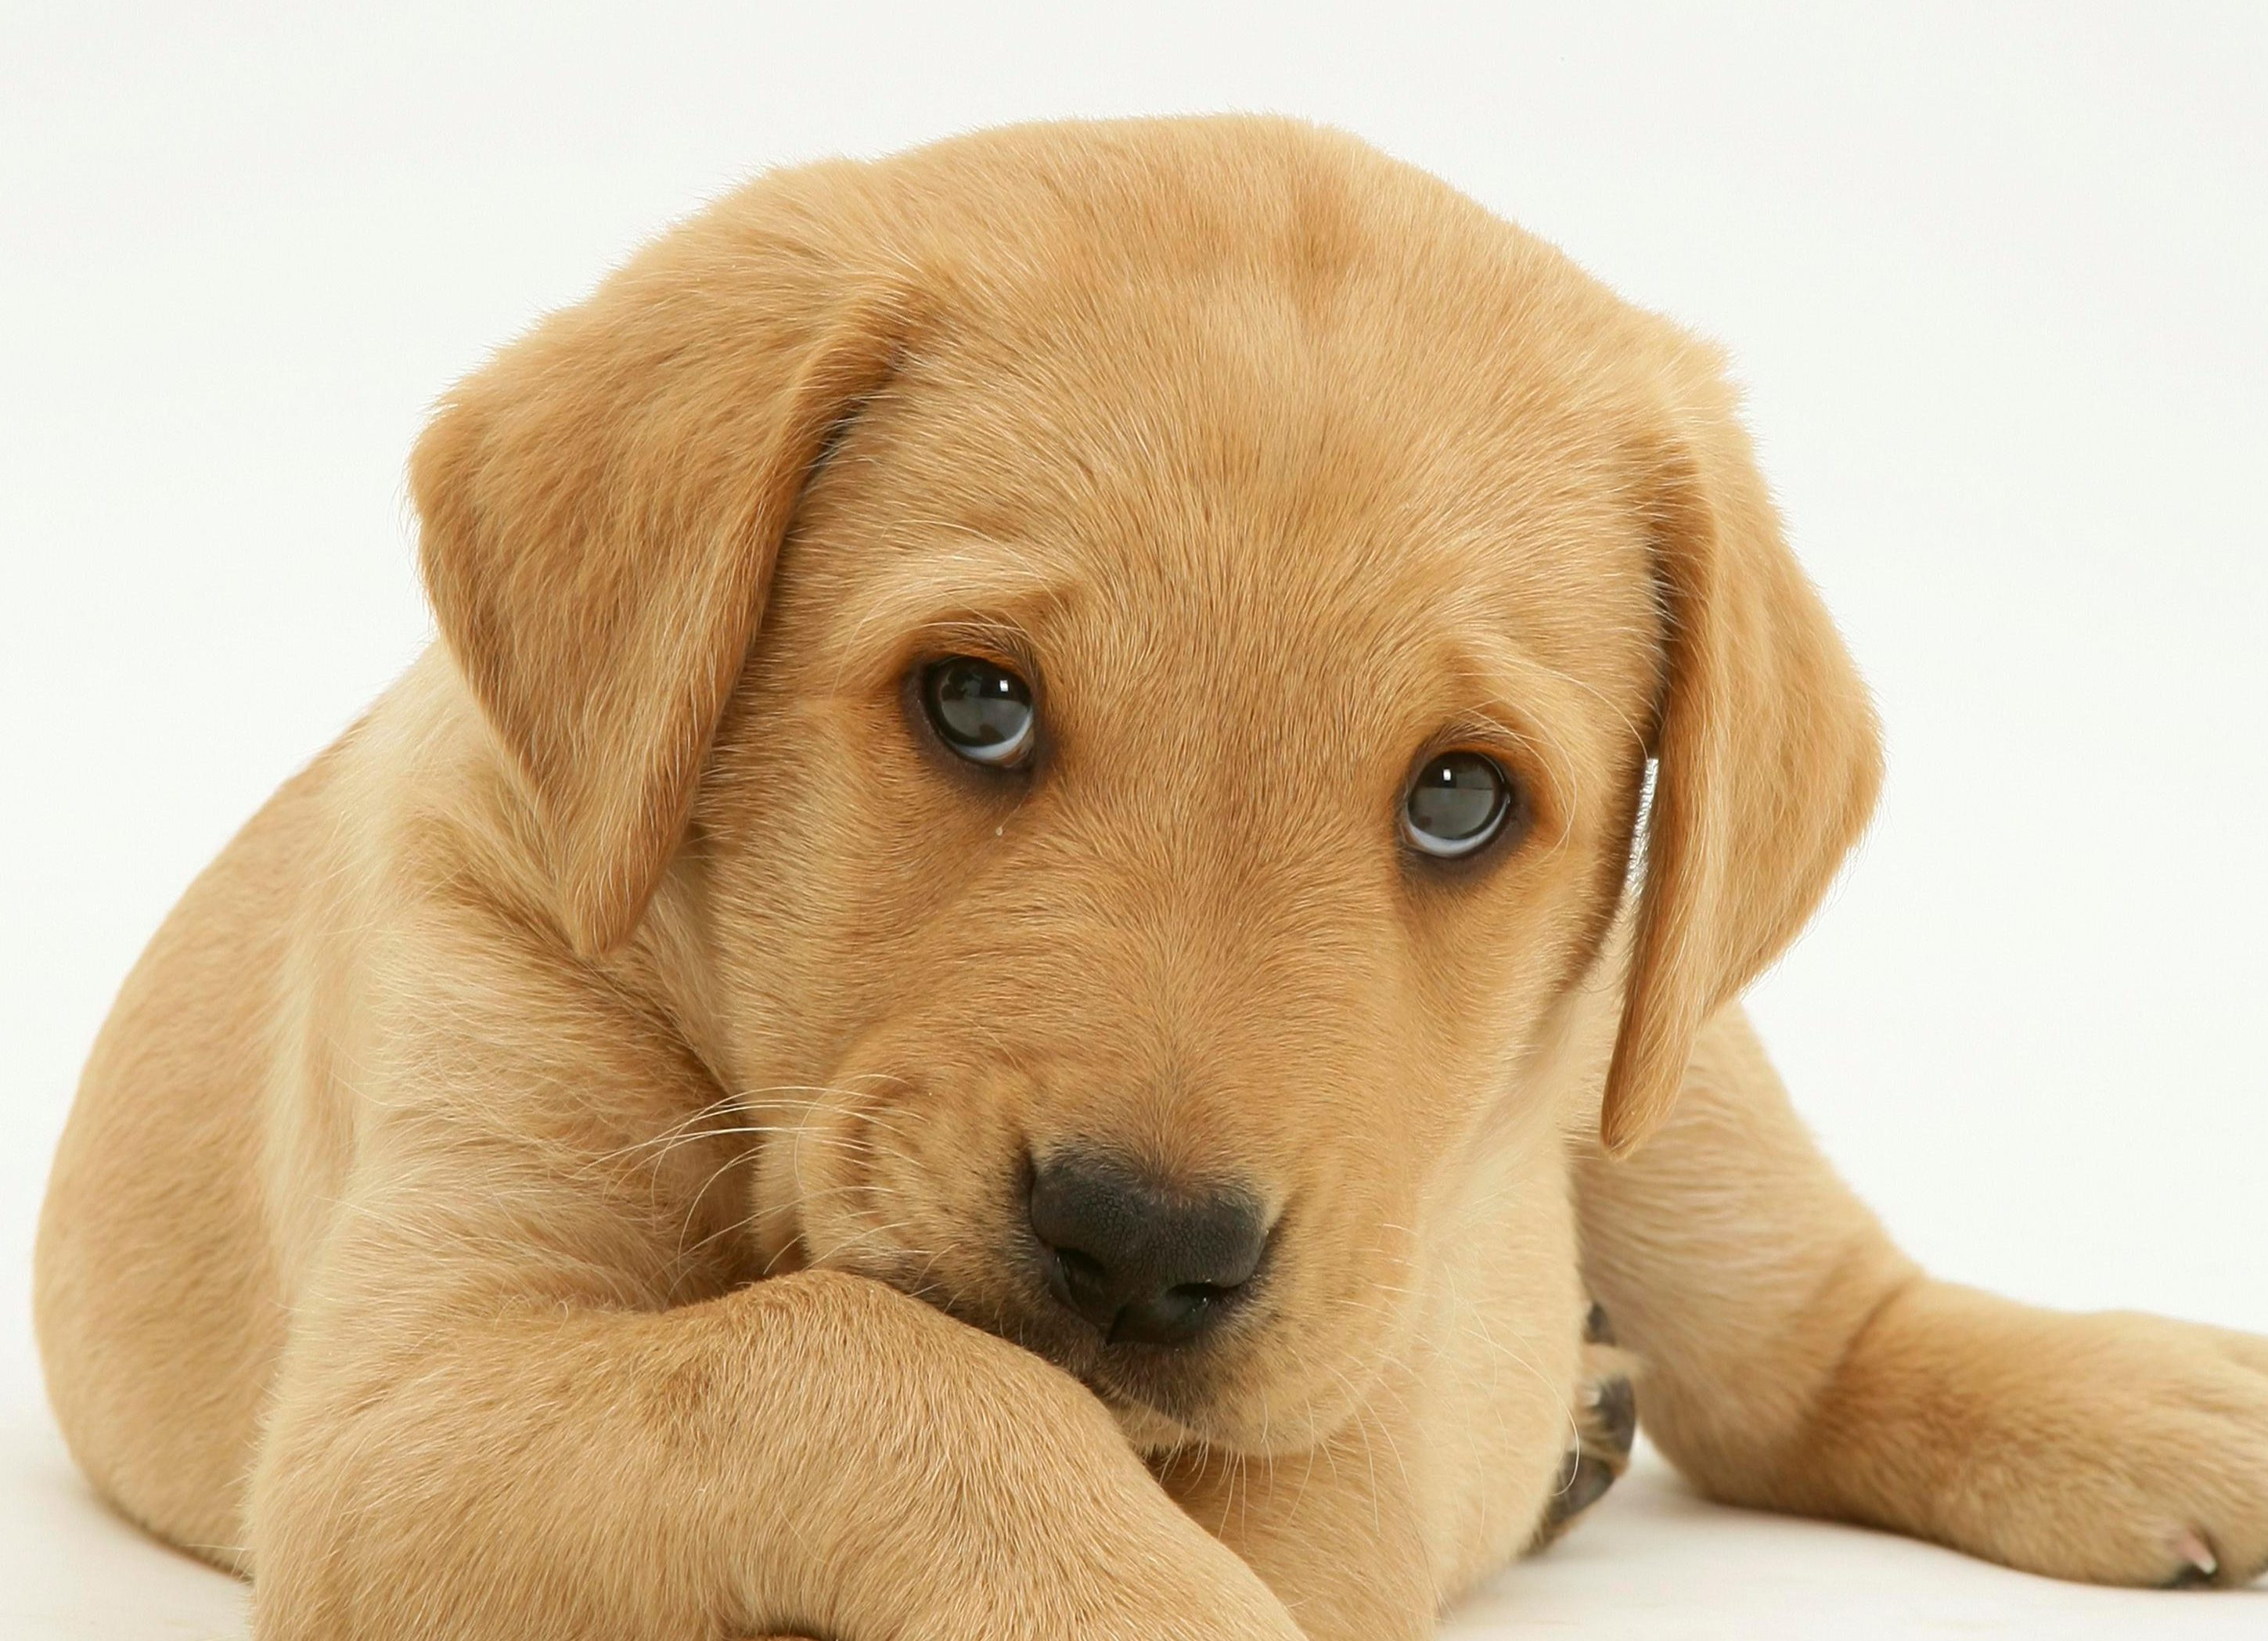

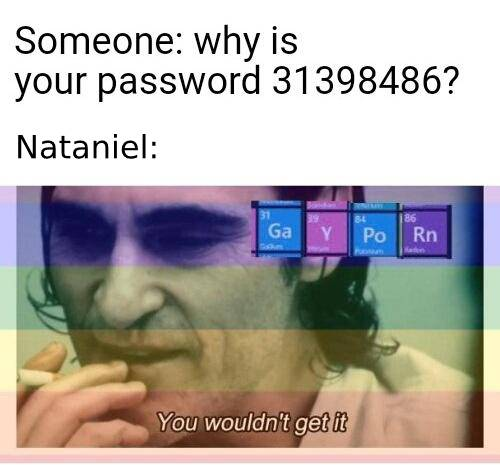

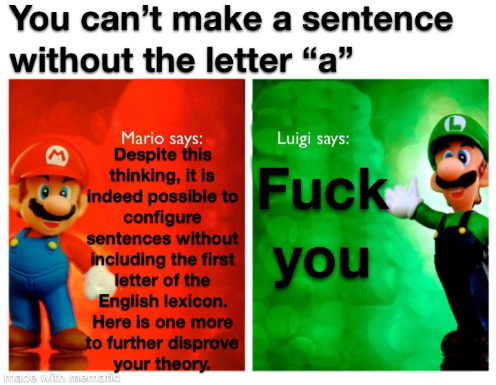

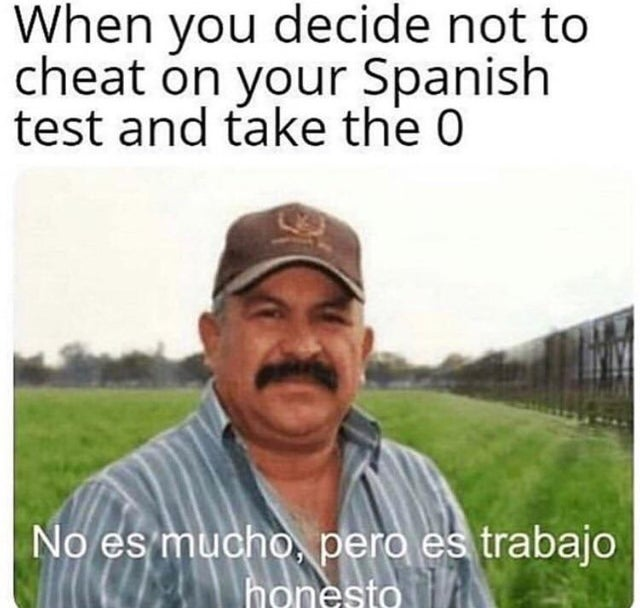

In [47]:
for filename in os.listdir(directory):
    
    with open(os.path.join(directory, filename), 'rb') as images_file:
        
        # zapytanie do IBM Cloud
        response = service.classify(images_file=images_file,
                                    classifier_ids='montaz_fotela_653318436'
                                    ).get_result()
        
    # wyodrębnienie interesujących nas informacji z pliku .json
    classes = response['images'][0]['classifiers'][0]['classes']

    # wyświetlenie obrazu
    display(Image(filename=os.path.join(directory, filename), width=400, height=400))

    # wyświetlenie wyników razem z pewnością
    for result in classes:
        display(HTML(str(result['class']) + ': ' + str(round(result['score'] * 100, 2)) + '%'))

    # pusta linia dla czytelności
    display(HTML('<br>'))